##import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

## data preprocessing

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

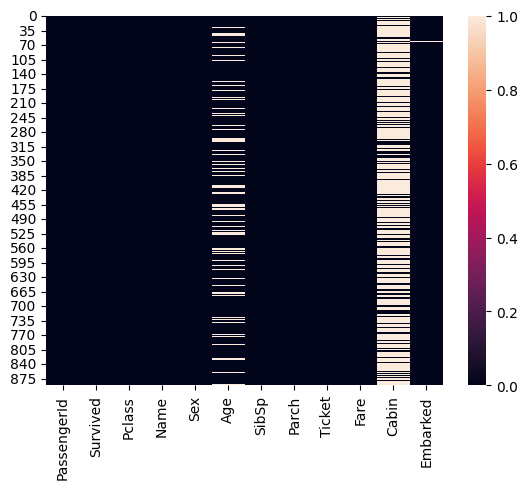

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
print("Missing 'Age' values after imputation:")
print(df['Age'].isnull().sum())

Missing 'Age' values after imputation:
0


In [ ]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)
print("Missing 'Embarked' values after imputation:")
print(df['Embarked'].isnull().sum())

Missing 'Embarked' values after imputation:
0


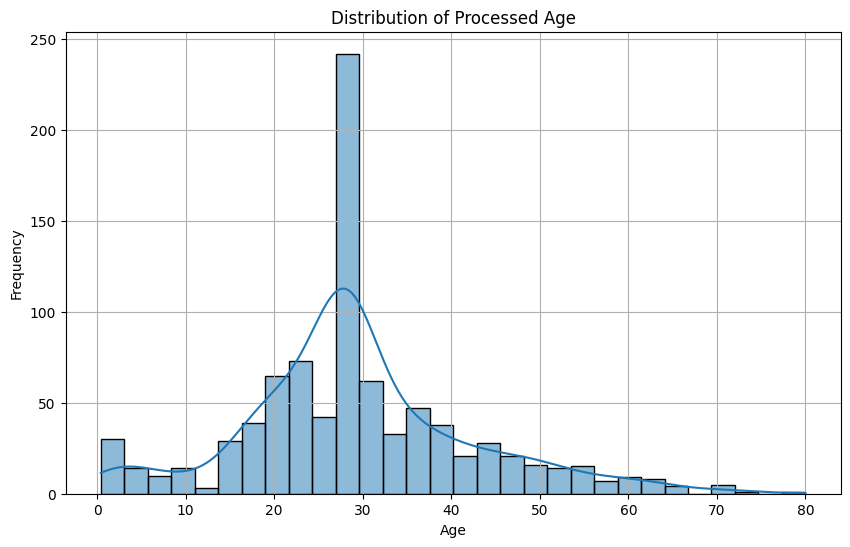

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Processed Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Encode Categorical Features

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [ ]:

df = pd.get_dummies(df, columns=['Embarked'])

In [ ]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [ ]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True


In [ ]:

passengers_id = df['PassengerId']
df = df.drop(['Cabin','Name','PassengerId','Ticket'], axis=1)
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


## data analysis

<Axes: xlabel='Survived', ylabel='count'>

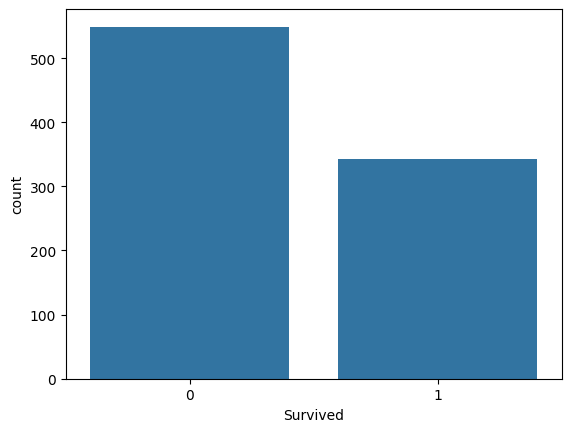

In [ ]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

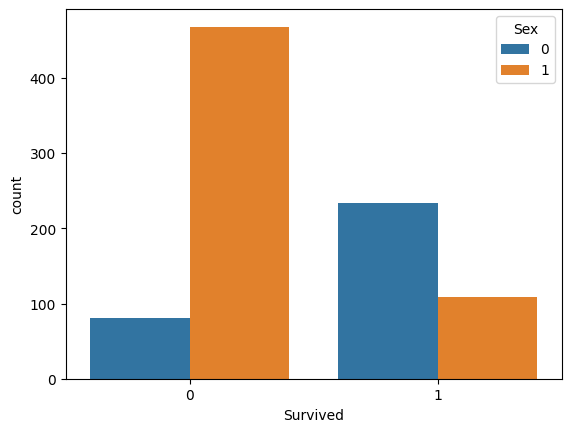

In [ ]:
sns.countplot(x='Survived',data=df,hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

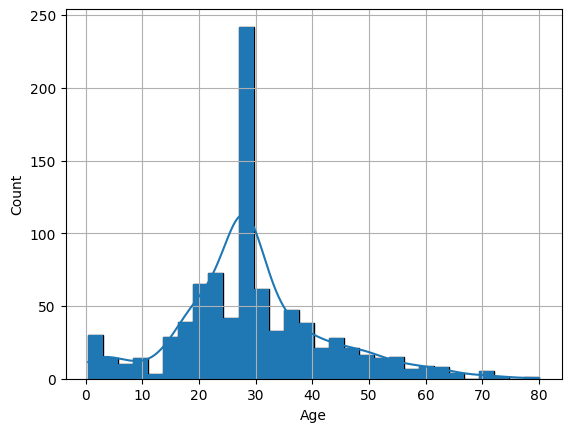

In [ ]:
sns.histplot(df['Age'], kde=True, bins=30)

df['Age'].hist(bins=30)

## Prepare Data for building the model

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Survived', axis=1 , inplace=False)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 9)
Shape of X_test: (179, 9)
Shape of y_train: (712,)
Shape of y_test: (179,)


## Train a Machine Learning Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

# Fit the model to the training data

model.fit(X_train, y_train)

#predict
y_pred = model.predict(X_test)

## Evaluate Model Performance

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head(10))

     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          0
290       1          1
300       1          1
333       0          0
208       1          1
136       1          1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



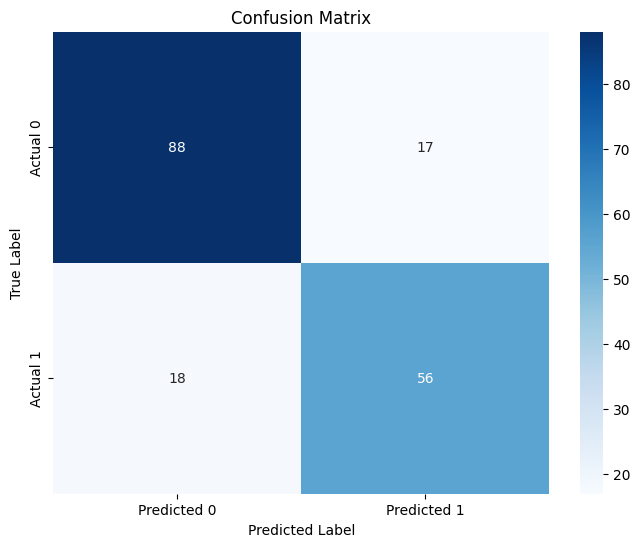

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## compare multiple models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

model_performance = {}

# Evaluate RandomForestClassifier (already trained)
y_pred_rf = model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
model_performance['RandomForestClassifier'] = {'accuracy': accuracy_rf, 'f1_score': f1_rf}

print("Initialized model_performance and evaluated RandomForestClassifier.")

Initialized model_performance and evaluated RandomForestClassifier.


In [ ]:
logistic_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver for small datasets
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
model_performance['LogisticRegression'] = {'accuracy': accuracy_lr, 'f1_score': f1_lr}

gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')
model_performance['GradientBoostingClassifier'] = {'accuracy': accuracy_gbc, 'f1_score': f1_gbc}

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
model_performance['SVC'] = {'accuracy': accuracy_svc, 'f1_score': f1_svc}

print("Model performance metrics:")
print(model_performance)

Model performance metrics:
{'RandomForestClassifier': {'accuracy': 0.8044692737430168, 'f1_score': 0.8042675461987596}, 'LogisticRegression': {'accuracy': 0.7988826815642458, 'f1_score': 0.7974270202218899}, 'GradientBoostingClassifier': {'accuracy': 0.8212290502793296, 'f1_score': 0.818814818086132}, 'SVC': {'accuracy': 0.659217877094972, 'f1_score': 0.6071190540464283}}


In [ ]:
#determination whose the best modle for data
best_model_name = ''
best_accuracy = 0
best_f1_score = 0

for model_name, metrics in model_performance.items():
    if metrics['accuracy'] > best_accuracy:
        best_accuracy = metrics['accuracy']
        best_f1_score = metrics['f1_score']
        best_model_name = model_name

if best_model_name == 'LogisticRegression':
    model = LogisticRegression(random_state=42, solver='liblinear')
elif best_model_name == 'GradientBoostingClassifier':
    model = GradientBoostingClassifier(random_state=42)
elif best_model_name == 'SVC':
    model = SVC(random_state=42)
# RandomForestClassifier is already in the 'model' variable, no need to re-assign if it's the best

# If the best model is not RandomForestClassifier, fit it to the training data
if best_model_name != 'RandomForestClassifier':
    model.fit(X_train, y_train)

print(f"The best performing model is: {best_model_name} with Accuracy: {best_accuracy:.4f} and F1-score: {best_f1_score:.4f}")

The best performing model is: GradientBoostingClassifier with Accuracy: 0.8212 and F1-score: 0.8188


##Determining the final algorithm

In [ ]:
gbc_metrics = model_performance['GradientBoostingClassifier']
accuracy_gbc = gbc_metrics['accuracy']
f1_gbc = gbc_metrics['f1_score']

print(f"GradientBoostingClassifier - Accuracy: {accuracy_gbc:.4f}")
print(f"GradientBoostingClassifier - F1-score: {f1_gbc:.4f}")

GradientBoostingClassifier - Accuracy: 0.8212
GradientBoostingClassifier - F1-score: 0.8188


In [ ]:
# Predict on the test set using the GBC model
y_pred_final = gbc_model.predict(X_test)

print("Classification Report for GradientBoostingClassifier:")
print(classification_report(y_test, y_pred_final))

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



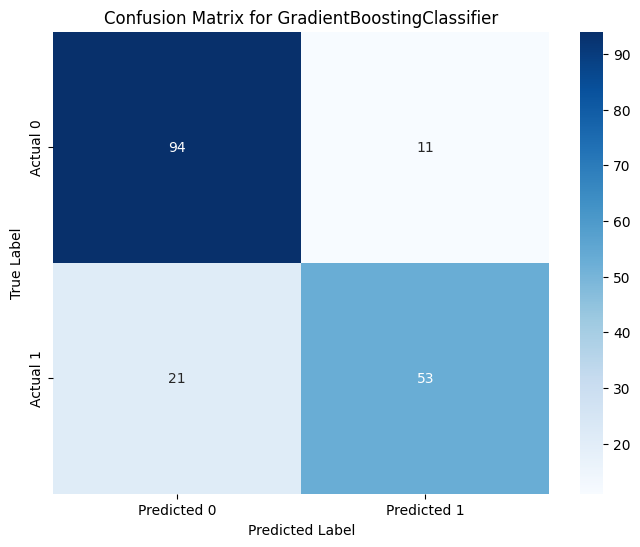

In [ ]:
cm_gbc = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()

##GradientBoostingClassifier is the best algorithm for data